# IRIS data

Data consist of informatiom about **3** different species of iris flowers.

* Iris-setosa
* Iris-versicolor
* Iris-verginica



The data contains information about the dimensions of flowers, i.e., the length and width of both the petal and sepal. The task is to visualize the dataset and explore any connections between the dimensions of the petal and sepal. Let's create a plot for the length/width of the petal versus the length/width of the sepal. This way, we can investigate if there is any correlation between these two sets of dimensions.

<function matplotlib.pyplot.show(close=None, block=None)>

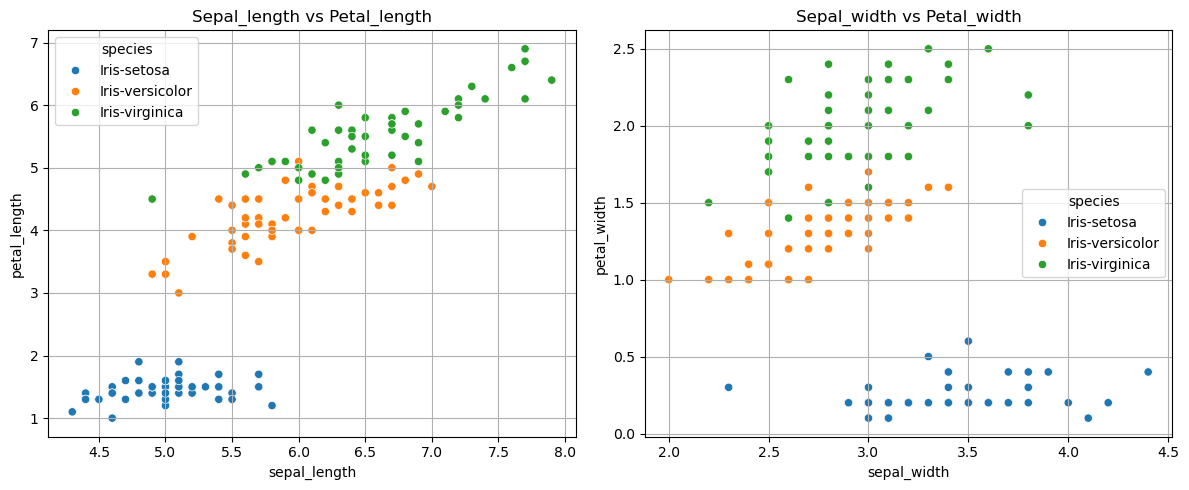

In [1]:
from IPython.display import HTML # So that we can convert tables to html properly
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


pd.set_option('display.max_rows', 200)
data = pd.read_csv('IRIS.csv')



fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=data, x="sepal_length", y="petal_length", hue="species" , ax = axes[0])
axes[0].set_title("Sepal_length vs Petal_length")
sns.scatterplot(data=data, x="sepal_width", y="petal_width", hue="species" , ax = axes[1])
axes[1].set_title("Sepal_width vs Petal_width")

plt.tight_layout()


for ax in axes:
    ax.grid(True)

plt.show


If you look at the length, you'll notice that all three species seem to have a positive correlation. However, the correlation is not as clear for Iris-setosa as for Iris-versicolor, Iris-virginica. If you then examine the width, the relationship appears more blurry. However, it seems to lean towards a positive correlation for Iris-versicolor, Iris-virginica, while Iris-setosa lacks a clear relationship. To investigate how these values are distributed, we can create boxplots and plot them close to each other for easier comparison.

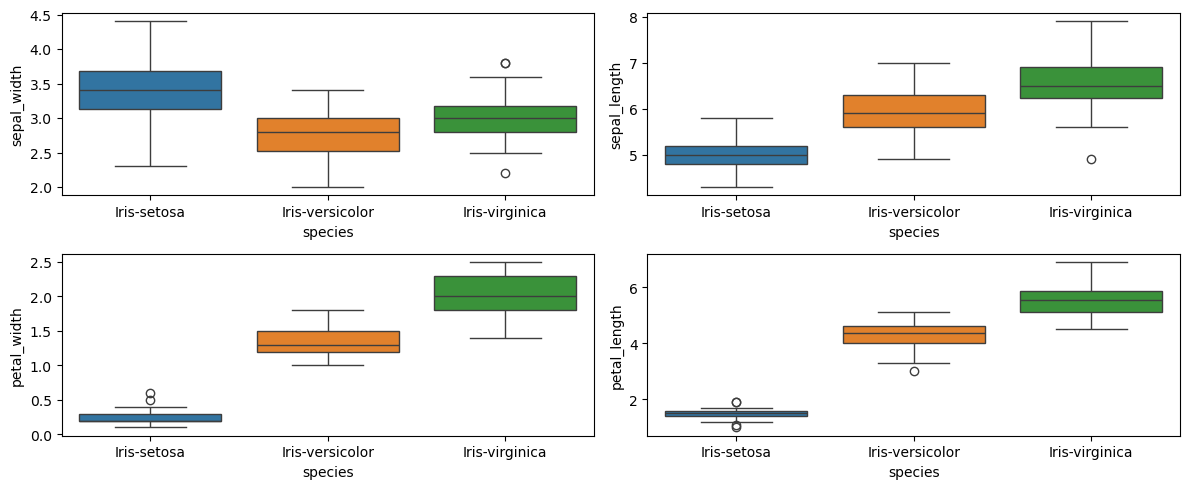

In [2]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))


sns.boxplot( y=data["sepal_width"], x=data["species"] , ax = axes[0,0], hue=data["species"])
sns.boxplot( y=data["sepal_length"], x=data["species"] , ax = axes[0,1], hue=data["species"])
sns.boxplot( y=data["petal_width"], x=data["species"] , ax = axes[1,0], hue=data["species"])
sns.boxplot( y=data["petal_length"], x=data["species"] , ax = axes[1,1], hue=data["species"])

plt.tight_layout()
plt.show()


### Conclusion 
From these boxplots we can conclude that the median for petal width is strict. The values or ordered as iris-setosa lowest , iris versicolor in the middle and iris virginica at the top. Same distribution is for petal_length and sepal length while sepal width has different distribution.dfdf 

<function matplotlib.pyplot.show(close=None, block=None)>

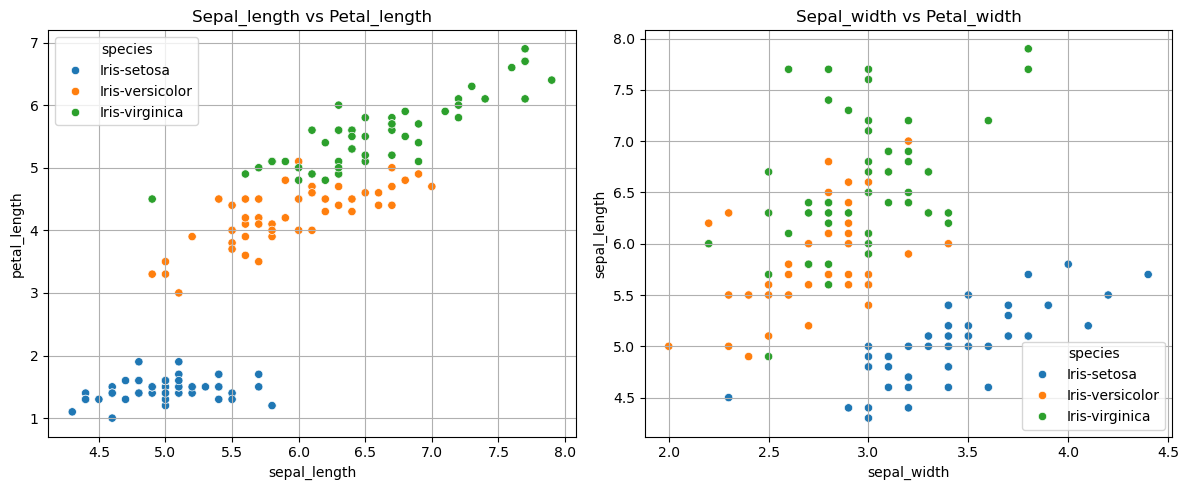

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=data, x="sepal_length", y="petal_length", hue="species" , ax = axes[0])
axes[0].set_title("Sepal_length vs Petal_length")


sns.scatterplot(data=data, x="sepal_width", y="sepal_length", hue="species" , ax = axes[1])
axes[1].set_title("Sepal_width vs Petal_width")

plt.tight_layout()


for ax in axes:
    ax.grid(True)

plt.show

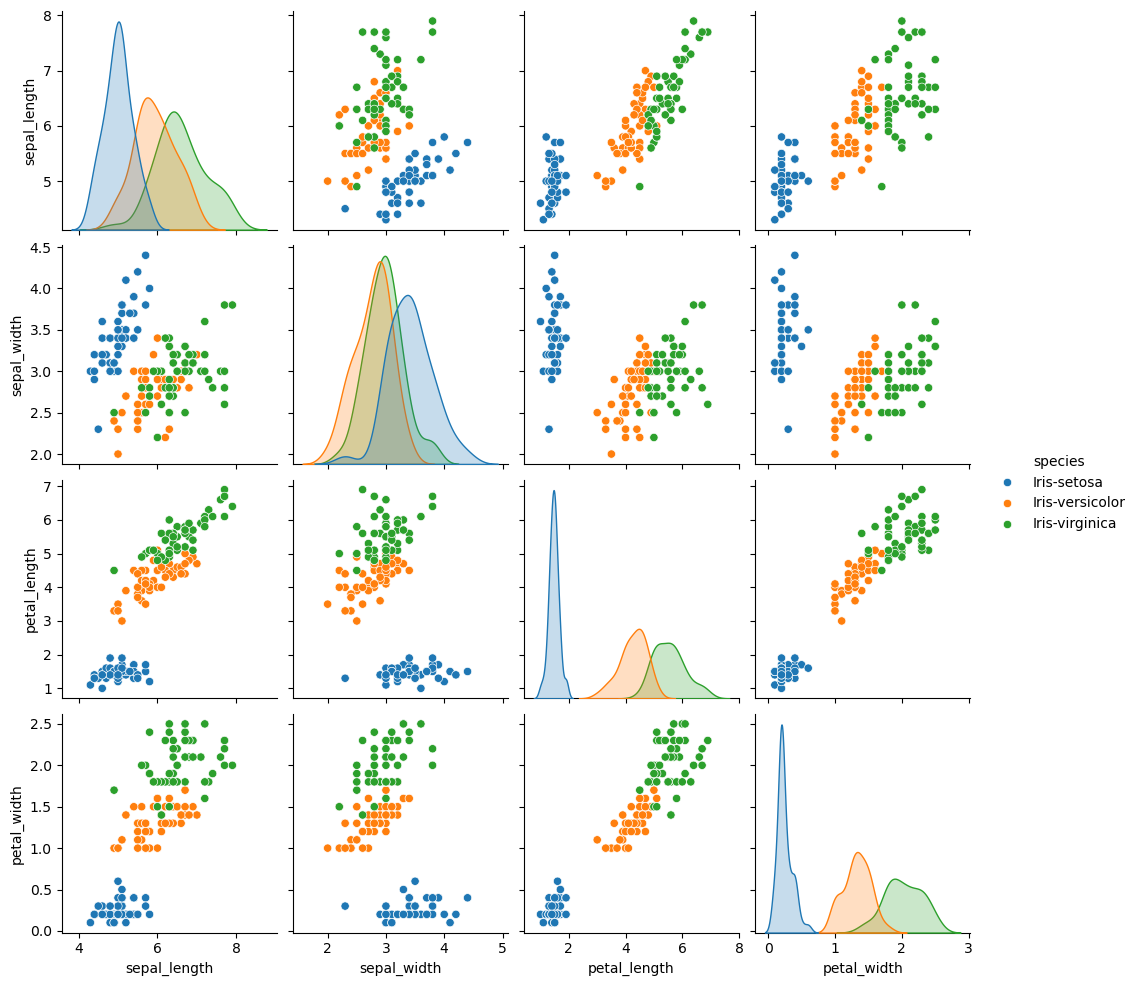

In [4]:
sns.pairplot(data, hue = "species")

From this pairplot we can easily acces the distributions for petal/sepal length and width and see scatter plots for each variable combination. For instance if we look at:

* Sepal Width and petal length plot:
 For iris setosa for the approximatly same petal length the values of sepal width can varie quite a bit
 while for iris-versicolor there seems to be a positive correlation.

# Birdwatching



In [5]:
data2 = pd.read_csv("artportalen.csv")
pd.set_option('display.max_columns', 30)
data2.head()

,Id,Taxonsorteringsordning,Rödlistade,Artnamn,Vetenskapligt namn,Auktor,Antal,Ålder/stadium,Kön,Aktivitet,Lokalnamn,Ostkoordinat,Nordkoordinat,Noggrannhet,Diffusion,Län,Kommun,Provins,Församling,Startdatum,Starttid,Slutdatum,Sluttid,Kommentar,Biotop,Rapportör,Observatörer
0,97785066,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",2,NaN,NaN,NaN,"Björnstigen 129,Bergshamra,Solna",1626890,6586736,25,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
1,97785067,54989,NaN,Blåmes,Cyanistes caeruleus,"(Linnaeus, 1758)",2,NaN,NaN,NaN,"Björnstigen 129,Bergshamra,Solna",1626890,6586736,25,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
2,97785310,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",1,NaN,NaN,NaN,Frösundavik,1626094,6585523,100,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
3,97786982,54735,NaN,Sparvhök,Accipiter nisus,"(Linnaeus, 1758)",1,NaN,hona,NaN,Frösundavik,1626094,6585523,100,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
4,97786985,54944,NaN,Skata,Pica pica,"(Linnaeus, 1758)",2,NaN,NaN,NaN,Tivoli,1626780,6585860,125,0,Stockholm,Solna,Uppland,Solna,2021-12-30,15:57,2022-01-01,09:36,NaN,NaN,Henrik Spovin,Henrik Spovin


In [6]:
data2['Antal'] = pd.to_numeric(data2['Antal'], errors='coerce') # Convert to numeric values and handle strings as NaN (if exists)

most_prelevant = data2.groupby('Artnamn')['Antal'].sum().reset_index() #Sum the number of birds 
most_prevalent_sorted = most_prelevant.sort_values(by='Antal', ascending=False) #Sorting from high to low

most_prevalent_sorted 

,Artnamn,Antal
42,Grönsiska,20211.0
120,Sothöna,8308.0
29,Gräsand,7167.0
132,Storskrake,6750.0
168,Vitkindad gås,6345.0
131,Storskarv,5281.0
2,Björktrast,3173.0
61,Koltrast,2750.0
166,Vigg,2375.0
113,Skrattmås,2326.0


Text(0.5, 1.0, 'Koltrast in Each Municipality')

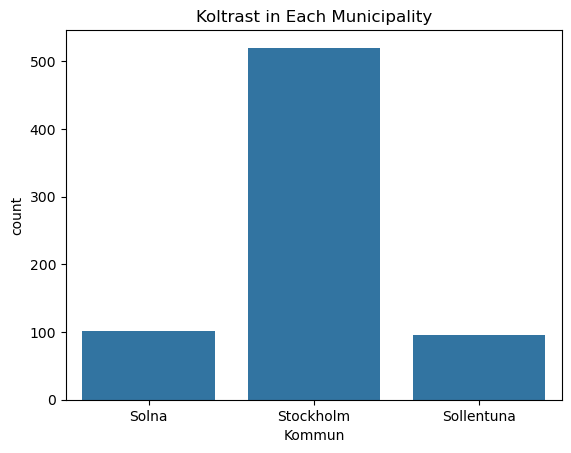

In [7]:
species_komun = data2.loc[data2['Artnamn'] == 'Koltrast', ['Artnamn', 'Kommun']] #Filtering the data so that we are using only the most prelevamnt species

sns.countplot(species_komun, x = "Kommun")
plt.title("Koltrast in Each Municipality")


In [8]:
species_accuracy = data2.loc[data2['Artnamn'] == 'Koltrast', ['Artnamn', 'Noggrannhet']] #Filtering the data so that we are using only the most prelevamnt species

accuracy = species_accuracy.loc[:,"Noggrannhet"] # Filtering

mean_accuracy = np.mean(accuracy) #Calculating mean
round(mean_accuracy)
np.median(accuracy)

197.0

In [9]:
total_observations = sum(most_prevalent_sorted.loc[:,"Antal"])

observation_of_interest = most_prevalent_sorted[most_prevalent_sorted['Artnamn'] == 'Grönsiska']
observation_of_interest1 = observation_of_interest.loc[:, "Antal"]
percent = round(100 * observation_of_interest1 / total_observations)
percent 

42    17.0
Name: Antal, dtype: float64

##### Monthly distribution



<Axes: title={'center': 'Monthly distribution for Gräsand'}, xlabel='Month'>

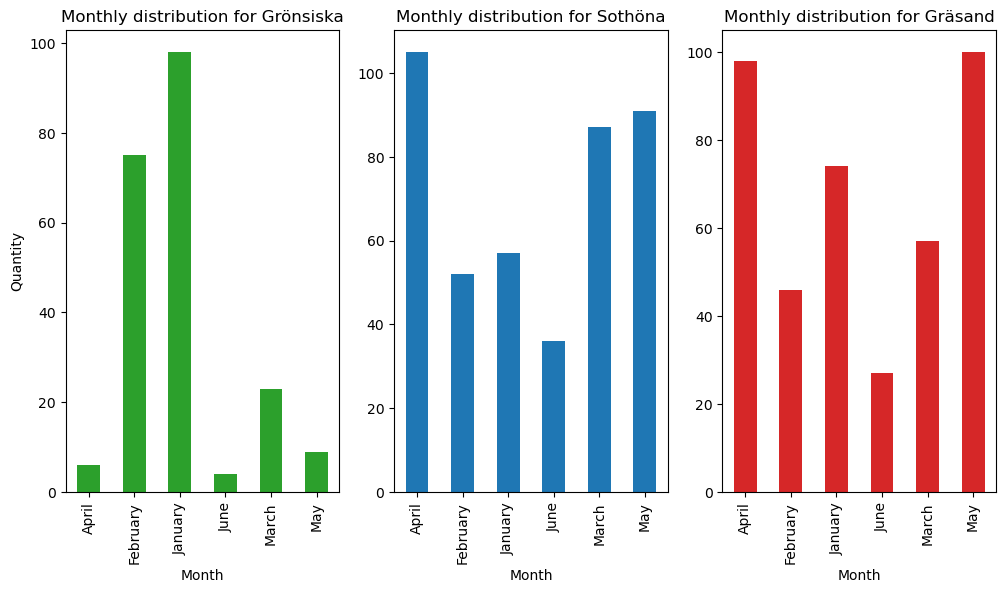

In [16]:
fig, ax = plt.subplots(1, 3, figsize = (12, 6))
x = data2[data2['Artnamn'] == 'Grönsiska']['Startdatum'].astype('datetime64[ns]')
y = data2[data2['Artnamn'] == 'Grönsiska']['Antal']

y.groupby(x.dt.month_name(locale = 'English')).count().plot(kind =  'bar',
                                                            color = 'tab:green',
                                                            xlabel = 'Month',
                                                            ylabel =  'Quantity',
                                                            title = 'Monthly distribution for Grönsiska',
                                                            ax = ax[0])
x = data2[data2['Artnamn'] == 'Sothöna']['Startdatum'].astype('datetime64[ns]')
y = data2[data2['Artnamn'] == 'Sothöna']['Antal']
y.groupby(x.dt.month_name(locale = 'English')).count().plot(kind = 'bar',
                                                            color ='tab:blue',
                                                            xlabel = 'Month',
                                                            title = 'Monthly distribution for Sothöna',
                                                            ax = ax[1])
x = data2[data2['Artnamn'] == 'Gräsand']['Startdatum'].astype('datetime64[ns]')
y = data2[data2['Artnamn'] == 'Gräsand']['Antal']
y.groupby(x.dt.month_name(locale = 'English')).count().plot(kind =  'bar',
                                                            color = 'tab:red',
                                                            xlabel =  'Month',
                                                            title =  'Monthly distribution for Gräsand',
                                                            ax = ax[2])

#### What are the most prevelant/rare species?

To find the most prelevant species one can simply sort and filter data in such a way that we have species in one column and number of species in other. One has then to sum up all the  From the plot one can se that the most prelevent species happens to be "Grönsiska" and the rearest species are "Ob. korsnäbb	". 

#### What are the monthly distrubution of 3 most prelevant species?


### Personal questions and answers

#### In what municipality are the Koltrast spicies prelevant?

    To answer this question we can make a count plot for the most prelevent species which is "Koltrast". 
    From the plot we can see that the most usual habitant for Koltrast is Stockholm kommun.
    
    
#### What is the mean accuracy for Koltrast?
    
    For this case one can create i dataframe with the most prelevent species and the accuracy values. 
    One can the easily calculate the accuracy by using the mean function and find out that its 265. 
    One should note that the mean is maybe not the best choise here because of the outliers. 
    The median = 197 might be a better choise
    
#### What is the ratio of the most prevalent species to the total number of observed species?
     To find this one can divide the total number of observed birds by the number of observed prelevant species. After doing 
     that we can see that its around 17 % 

# Predicting Strokes

In [11]:
data3 = pd.read_csv("stroke-data.csv")

data3

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### Questions that gives good insight into the data:
* What is the distribution for the smoking status among people with heart disease?
* What is the ratio for heart decease amongs men and women?
* How does the smoking status differs depending on worktype?
To answer those question one can oobserve the following

#### What is the distribution for the smoking status among people with heart disease?
Lets filter our data first by the people that had the heart disease and the plot the smoking status for those
to see the distrubution.

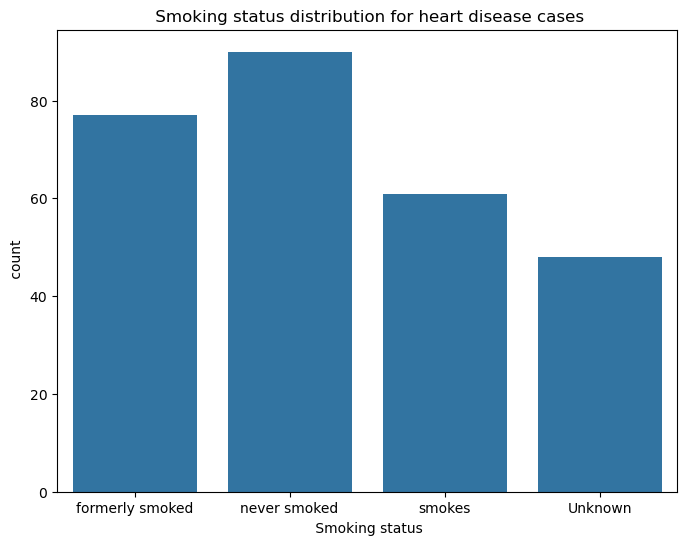

In [50]:
data3_cleaned = data3[data3['heart_disease'] == 1]

plt.figure(figsize=(8, 6))
sns.countplot(x= 'smoking_status', data=data3_cleaned)
plt.title(' Smoking status distribution for heart disease cases')
plt.xlabel(' Smoking status')
plt.ylabel(' count')

plt.show()

#### What is the ratio for heart decease amongs men and women?


In [52]:
info = data3.loc[:,["gender", "heart_disease"]]

gender_heart_disease_counts = info.groupby(['gender', 'heart_disease']).size().reset_index(name='count')

men_data = gender_heart_disease_counts[gender_heart_disease_counts['gender'] == 'Male']
women_data = gender_heart_disease_counts[gender_heart_disease_counts['gender'] == 'Female']


ratio_men = round(men_data[men_data['heart_disease'] == 1]['count'].sum() / men_data['count'].sum(), 2) * 100
ratio_women = round(women_data[women_data['heart_disease'] == 1]['count'].sum() / women_data['count'].sum(),2) * 100


print("Ratio of heart disease for Men:", ratio_men, " %")
print("Ratio of heart disease for Women:", ratio_women, " %")

Ratio of heart disease for Men: 8.0  %
Ratio of heart disease for Women: 4.0  %


#### How does the smoking status differs depending on worktype?



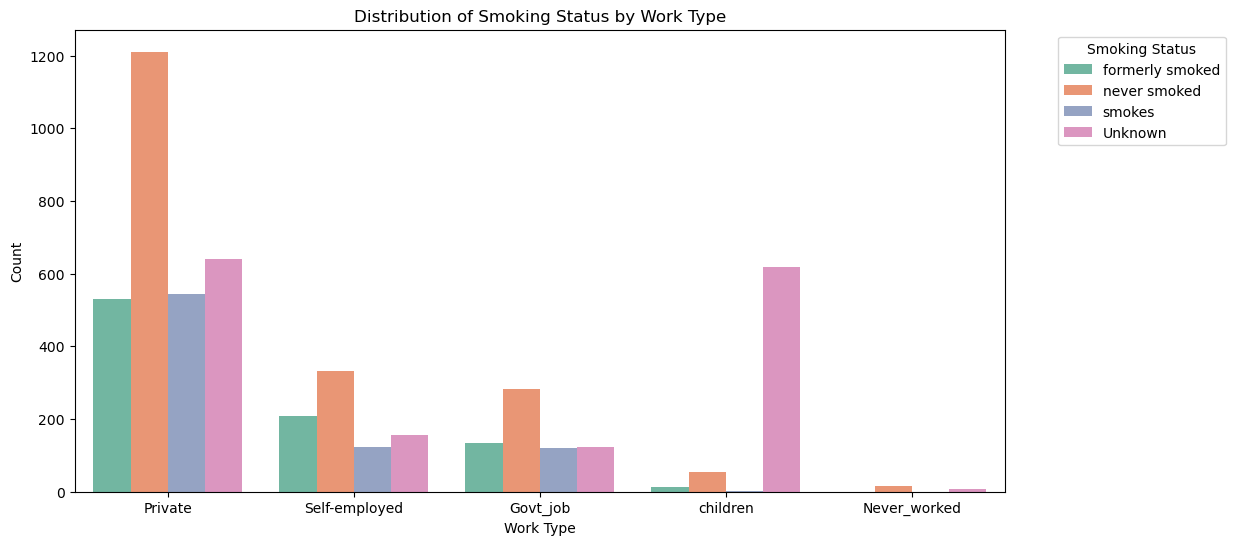

In [51]:
df_cleaned1 = data3.dropna(subset=['work_type', 'smoking_status'])


plt.figure(figsize=(12, 6))
sns.countplot(x='work_type', hue='smoking_status', data=df_cleaned1, palette='Set2')
plt.title('Distribution of Smoking Status by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Smoking Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

We can see that for all 3 work sectors in this data set most people never smoked.

In [54]:
!jupyter nbconvert --to markdown HW3.ipynb

[NbConvertApp] Converting notebook HW3.ipynb to markdown
[NbConvertApp] Support files will be in HW3_files\
[NbConvertApp] Making directory HW3_files
[NbConvertApp] Making directory HW3_files
[NbConvertApp] Making directory HW3_files
[NbConvertApp] Making directory HW3_files
[NbConvertApp] Making directory HW3_files
[NbConvertApp] Making directory HW3_files
[NbConvertApp] Making directory HW3_files
[NbConvertApp] Making directory HW3_files
[NbConvertApp] Writing 34789 bytes to HW3.md
